<a href="https://colab.research.google.com/github/yumnahussain444/PREDOC-Coding-Sample/blob/main/Coding_SamplePredoc_YumnaHussain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
import os
import statsmodels.formula.api as smf
from scipy import stats

In [2]:
# Set display options to see more columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

In [3]:
# Set visual styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.family'] = 'serif'

In [6]:
#load the data

file_path = 'https://raw.githubusercontent.com/yumnahussain444/survey_data_cleaned/main/survey_data_cleaned.csv'
df = pd.read_csv(file_path)

print(df.head())


          StartDate           EndDate      RecordedDate         ResponseId                                      Achap1_belief                                      Achap2_belief                                      Bchap1_belief                                      Bchap2_belief  Achap1_val_scale  Achap1_aro_scale  Achap1_val_cert  Achap1_aro_cert  Achap2_val_scale  Achap2_aro_scale  Achap2_val_cert  Achap2_aro_cert  Bchap1_val_scale  Bchap1_aro_scale  Bchap1_val_cert  Bchap1_aro_cert  Bchap2_val_scale  Bchap2_aro_scale  Bchap2_val_cert  Bchap2_aro_cert  Achap2_val_surprise  Achap2_aro_surprise  Bchap2_val_surprise  Bchap2_aro_surprise  genre_1  genre_2  genre_3  genre_4  genre_5  genre_6  genre_7  genre_8  genre_9  genre_10  totalOffTask  totalOnTask  Durationinseconds  tasktime  duration_minutes  engagement_ratio  valence_change_A  arousal_change_A  valence_change_B  arousal_change_B  valence_surprise_A  arousal_surprise_A  valence_surprise_B arousal_surprise_B  certainty_valence_A  \

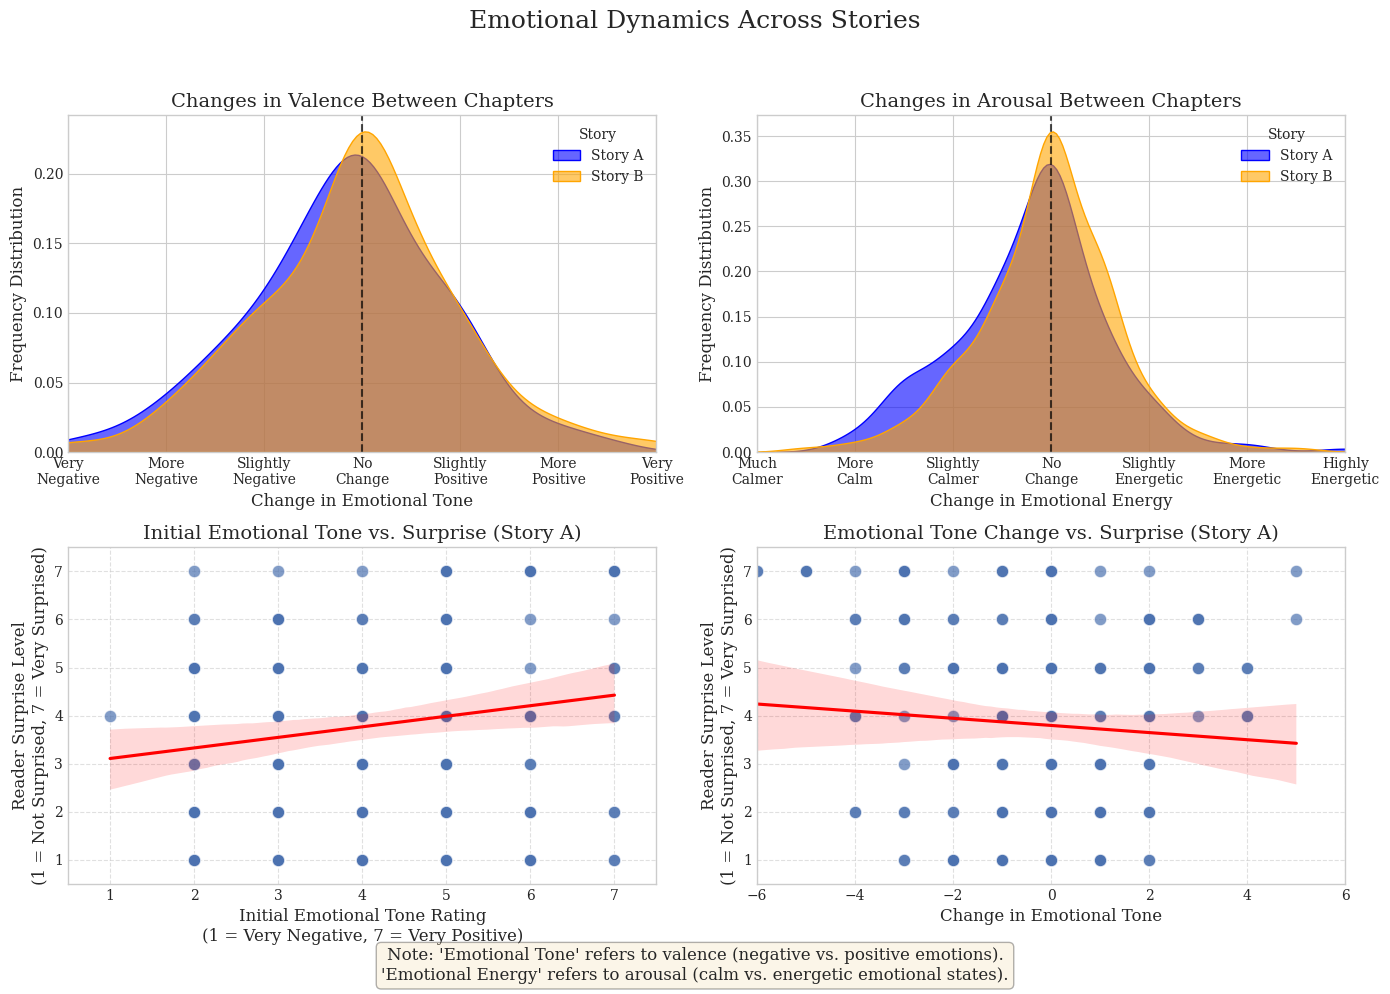

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Helper function for KDE plots
def plot_kde_change(data1, data2, title, xlabel, xticklabels):
    sns.kdeplot(data1, fill=True, label='Story A', color='blue', alpha=0.6)
    sns.kdeplot(data2, fill=True, label='Story B', color='orange', alpha=0.6)
    plt.axvline(x=0, color='black', linestyle='--', alpha=0.7)
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency Distribution', fontsize=12)
    plt.legend(title='Story', loc='upper right')
    x_min, x_max = plt.xlim()
    plt.xlim(max(x_min, -6), min(x_max, 6))
    plt.xticks([-6, -4, -2, 0, 2, 4, 6], xticklabels)

# Helper function for scatter plots
def plot_scatter(x, y, title, xlabel, ylabel, xlim=(0.5, 7.5), ylim=(0.5, 7.5), xticks=None, yticks=None):
    sns.scatterplot(x=x, y=y, data=df, alpha=0.7, s=80)
    sns.regplot(x=x, y=y, data=df, scatter=False, color='red')
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    if xticks: plt.xticks(xticks)
    if yticks: plt.yticks(yticks)
    plt.grid(True, linestyle='--', alpha=0.6)

# Create the figure
plt.figure(figsize=(14, 10))
plt.suptitle('Emotional Dynamics Across Stories', fontsize=18, y=0.98)

# Plot 1
plt.subplot(2, 2, 1)
plot_kde_change(
    df['valence_change_A'], df['valence_change_B'],
    'Changes in Valence Between Chapters',
    'Change in Emotional Tone',
    ['Very\nNegative', 'More\nNegative', 'Slightly\nNegative',
     'No\nChange', 'Slightly\nPositive', 'More\nPositive', 'Very\nPositive']
)

# Plot 2
plt.subplot(2, 2, 2)
plot_kde_change(
    df['arousal_change_A'], df['arousal_change_B'],
    'Changes in Arousal Between Chapters',
    'Change in Emotional Energy',
    ['Much\nCalmer', 'More\nCalm', 'Slightly\nCalmer',
     'No\nChange', 'Slightly\nEnergetic', 'More\nEnergetic', 'Highly\nEnergetic']
)

# Plot 3
plt.subplot(2, 2, 3)
plot_scatter(
    'Achap1_val_scale', 'valence_surprise_A',
    'Initial Emotional Tone vs. Surprise (Story A)',
    'Initial Emotional Tone Rating\n(1 = Very Negative, 7 = Very Positive)',
    'Reader Surprise Level\n(1 = Not Surprised, 7 = Very Surprised)',
    xticks=[1, 2, 3, 4, 5, 6, 7],
    yticks=[1, 2, 3, 4, 5, 6, 7]
)

# Plot 4
plt.subplot(2, 2, 4)
plot_scatter(
    'valence_change_A', 'valence_surprise_A',
    'Emotional Tone Change vs. Surprise (Story A)',
    'Change in Emotional Tone',
    'Reader Surprise Level\n(1 = Not Surprised, 7 = Very Surprised)',
    xlim=(-6, 6),
    xticks=[-6, -4, -2, 0, 2, 4, 6],
    yticks=[1, 2, 3, 4, 5, 6, 7]
)

# Add a note
plt.figtext(0.5, 0.01,
    "Note: 'Emotional Tone' refers to valence (negative vs. positive emotions).\n"
    "'Emotional Energy' refers to arousal (calm vs. energetic emotional states).",
    ha='center', fontsize=12, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

# Final layout and save
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('emotional_dynamics.png', dpi=300, bbox_inches='tight')
plt.show()

files.download('emotional_dynamics.png')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Correlation (Story A): r = nan, p = nan
Regression Summary (Story A):
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.6553      0.410      8.911      0.000       2.846       4.464
certainty_valence_A     0.0386      0.090      0.427      0.670      -0.139       0.217

Correlation (Story B): r = nan, p = nan
Regression Summary (Story B):
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.7667      0.141     26.804      0.000       3.490       4.044
certainty_valence_B     0.0049      0.006      0.783      0.435      -0.007       0.017


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

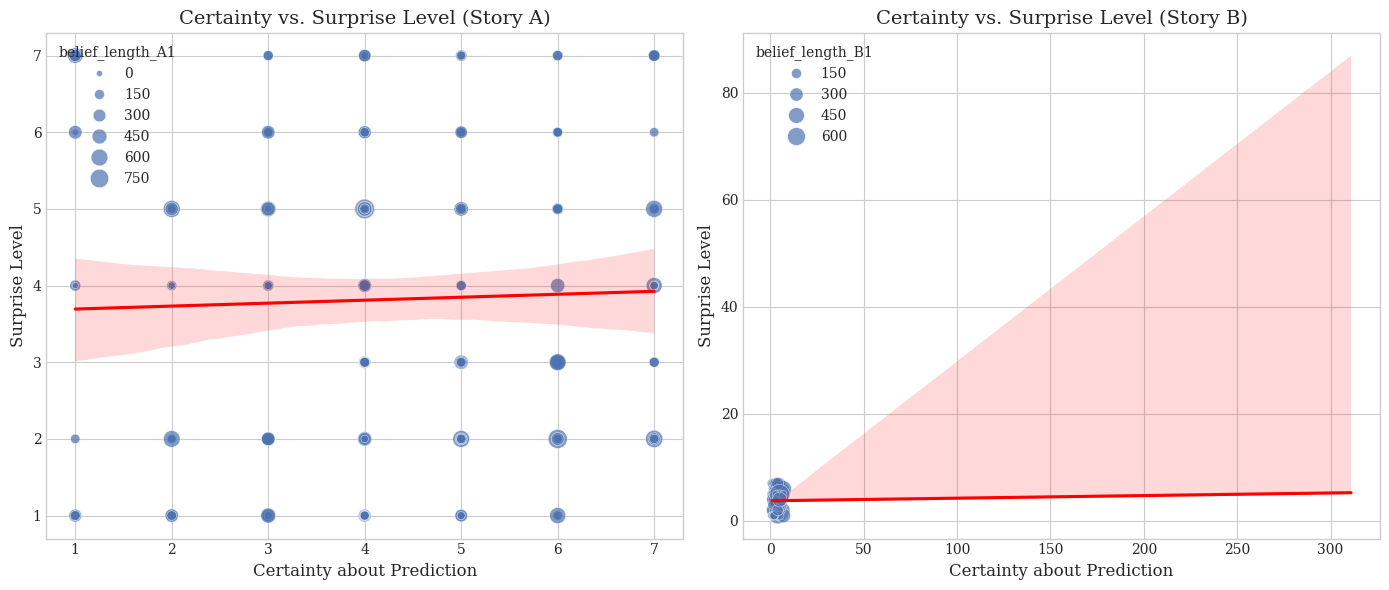

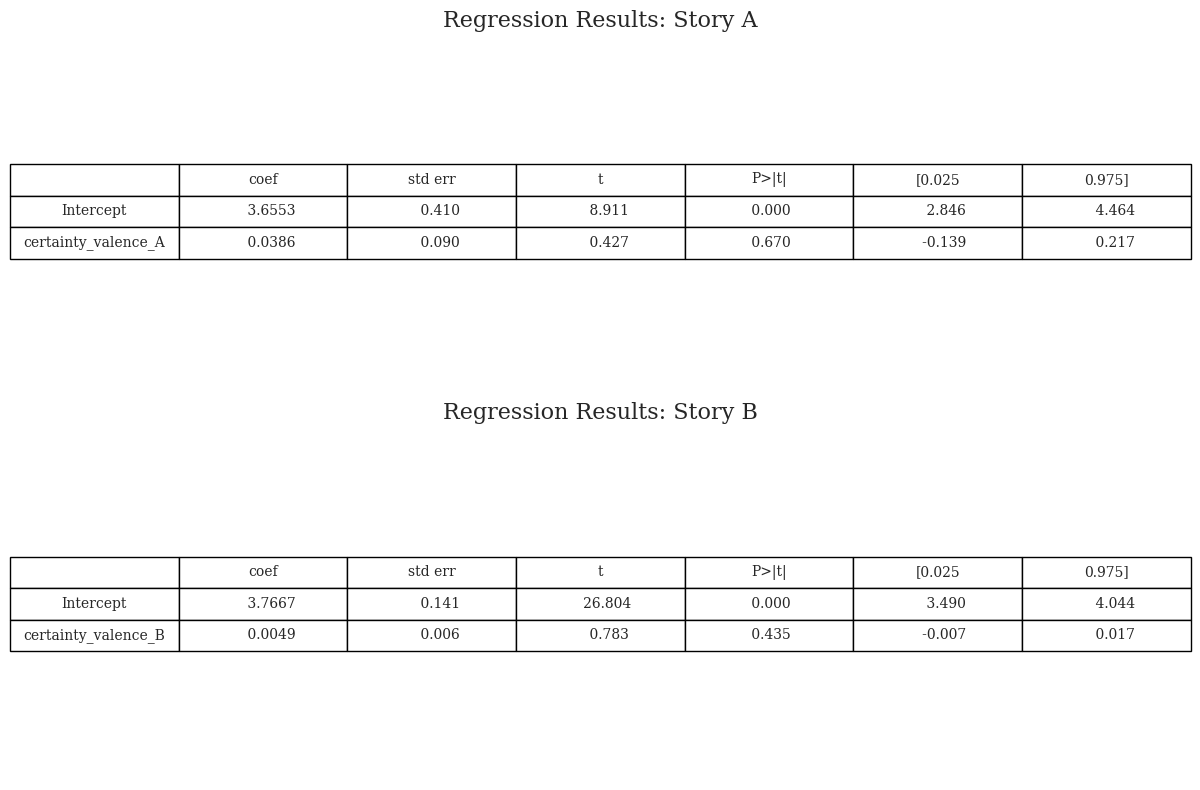

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from google.colab import files


# Visualization: Certainty vs. Surprise for both stories

def plot_certainty_vs_surprise(story_label, cert_col, surprise_col, size_col, subplot_index):
    """
    Scatter + regression plot showing relationship between prediction certainty
    and experienced surprise, with point size reflecting belief explanation length.
    """
    plt.subplot(1, 2, subplot_index)
    sns.scatterplot(
        x=cert_col, y=surprise_col, data=df,
        size=size_col, sizes=(20, 200), alpha=0.7
    )
    sns.regplot(x=cert_col, y=surprise_col, data=df, scatter=False, color='red')
    plt.title(f'Certainty vs. Surprise Level ({story_label})', fontsize=14)
    plt.xlabel('Certainty about Prediction', fontsize=12)
    plt.ylabel('Surprise Level', fontsize=12)

# Create side-by-side plots for Story A and Story B
plt.figure(figsize=(14, 6))
plot_certainty_vs_surprise("Story A", 'certainty_valence_A', 'valence_surprise_A', 'belief_length_A1', 1)
plot_certainty_vs_surprise("Story B", 'certainty_valence_B', 'valence_surprise_B', 'belief_length_B1', 2)
plt.tight_layout()

# Save and download the plot as a high-quality image
plt.savefig('certainty_and_surprise.png', dpi=300)
files.download('certainty_and_surprise.png')

# Correlation + Linear Regression Analysis

def analyze_relationship(story, x_col, y_col):
    """
    Computes Pearson correlation and fits a linear regression model
    between certainty and surprise for a given story.
    """
    corr = stats.pearsonr(df[x_col], df[y_col])  # Correlation coefficient and p-value
    model = smf.ols(f'{y_col} ~ {x_col}', data=df).fit()  # Linear regression
    print(f"\nCorrelation ({story}): r = {corr[0]:.3f}, p = {corr[1]:.3f}")
    print(f"Regression Summary ({story}):\n", model.summary().tables[1])  # Print regression stats only
    return corr, model

# Run analysis for both stories
corr_a, model_a = analyze_relationship("Story A", 'certainty_valence_A', 'valence_surprise_A')
corr_b, model_b = analyze_relationship("Story B", 'certainty_valence_B', 'valence_surprise_B')


# Export Regression Tables (as CSVs)
def save_regression_table(model, filename):
    """
    Extracts and saves regression summary (coefficients, std error, p-values) to CSV.
    """
    table = model.summary().tables[1]  # Regression results table only
    df_table = pd.DataFrame(table.data[1:], columns=table.data[0])  # Skip header row
    df_table.to_csv(filename, index=False)
    files.download(filename)
    return df_table

# Save and download regression tables for each story
df_reg_A = save_regression_table(model_a, 'regression_results_A.csv')
df_reg_B = save_regression_table(model_b, 'regression_results_B.csv')


# Correlation Summary Table (combined stats)
correlation_summary = pd.DataFrame({
    'Story': ['Story A', 'Story B'],
    'Correlation': [corr_a[0], corr_b[0]],
    'p-value': [corr_a[1], corr_b[1]],
    'R-squared': [model_a.rsquared, model_b.rsquared]
})
correlation_summary.to_csv('correlation_summary.csv', index=False)
files.download('correlation_summary.csv')


# Regression Tables as Visual Images

def draw_regression_table(df_table, title, subplot_idx):
    """
    Renders regression summary table as a matplotlib image subplot.
    """
    plt.subplot(2, 1, subplot_idx)
    plt.axis('off')
    plt.title(title, fontsize=16)
    table = plt.table(cellText=df_table.values, colLabels=df_table.columns,
                      loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)

# Create a figure with both regression tables as visual outputs
plt.figure(figsize=(12, 8))
draw_regression_table(df_reg_A, "Regression Results: Story A", 1)
draw_regression_table(df_reg_B, "Regression Results: Story B", 2)
plt.tight_layout()

# Save and download the visual as PNG
plt.savefig('regression_tables.png', dpi=300, bbox_inches='tight')
files.download('regression_tables.png')


<ipython-input-9-2b12de780ff1>:25: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_result = stats.f_oneway(*surprise_by_genre)
<ipython-input-9-2b12de780ff1>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fav_genre', y='valence_surprise_A', data=genre_analysis, palette='viridis')


ANOVA test: F=nan, p=nan


<ipython-input-9-2b12de780ff1>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fav_genre', y='valence_change_A', data=genre_analysis, palette='viridis')
<ipython-input-9-2b12de780ff1>:70: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_change = stats.f_oneway(*change_by_genre)


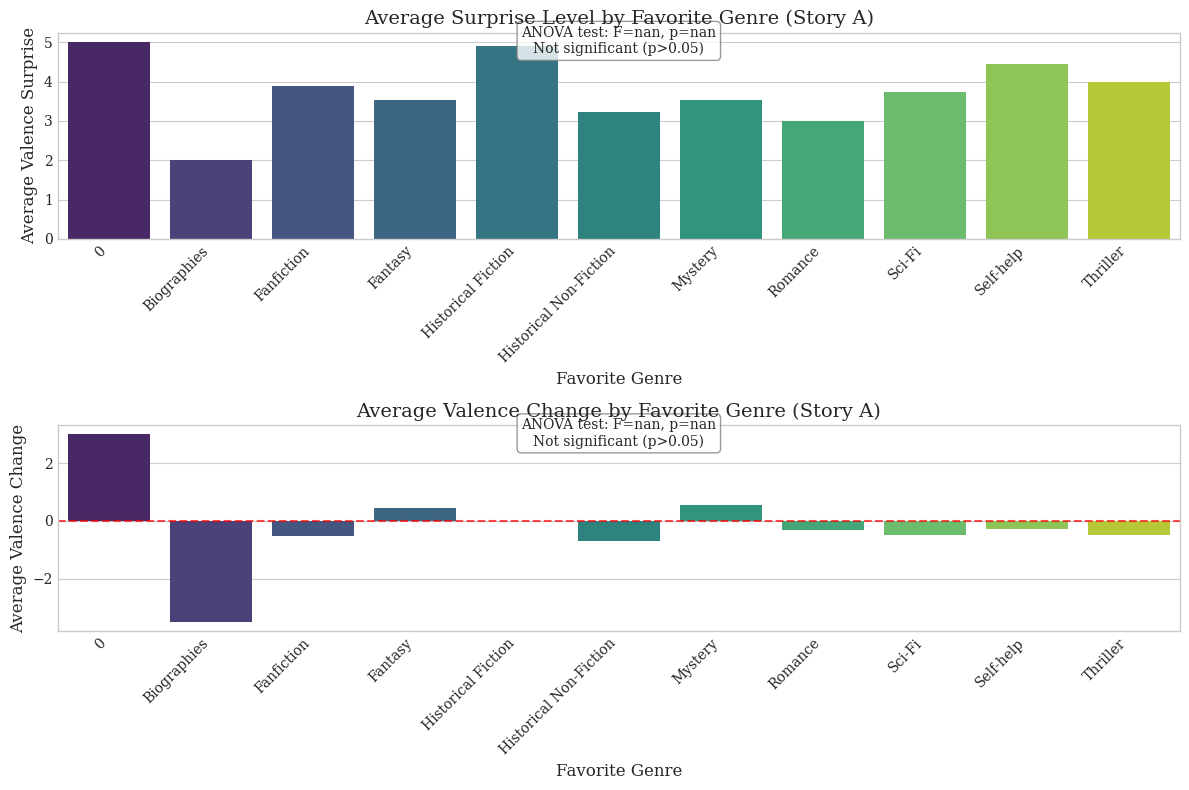

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

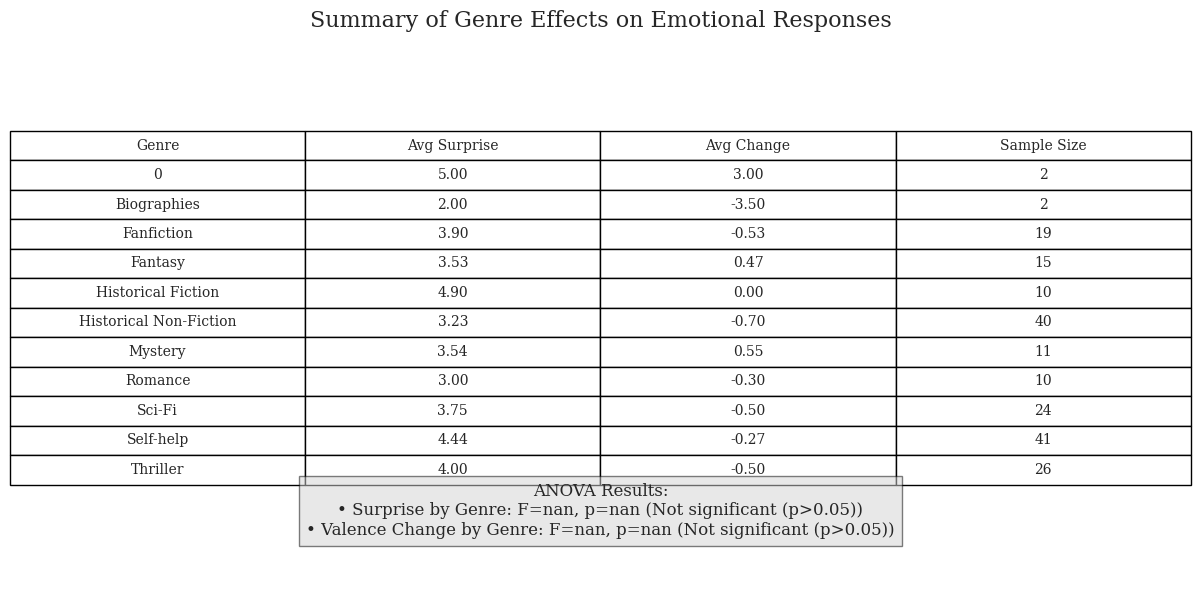

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import files

# ------------------------------
# PART 1: Prepare Data & Run ANOVA
# ------------------------------

# Calculate average emotional responses by favorite genre
genre_analysis = df.groupby('fav_genre')[[
    'valence_surprise_A', 'arousal_surprise_A',
    'valence_change_A', 'arousal_change_A'
]].mean().reset_index()

# List of genres for ANOVA
genres = df['fav_genre'].unique().tolist()

# Prepare list of surprise scores grouped by genre for ANOVA
surprise_by_genre = [df[df['fav_genre'] == genre]['valence_surprise_A'].values for genre in genres]

# Run ANOVA: Does favorite genre significantly affect surprise levels?
anova_result = stats.f_oneway(*surprise_by_genre)
anova_text = f"ANOVA test: F={anova_result.statistic:.3f}, p={anova_result.pvalue:.3f}"
print(anova_text)

# Interpret ANOVA p-value
if anova_result.pvalue < 0.001:
    significance = "Highly significant (p<0.001)"
elif anova_result.pvalue < 0.01:
    significance = "Very significant (p<0.01)"
elif anova_result.pvalue < 0.05:
    significance = "Significant (p<0.05)"
else:
    significance = "Not significant (p>0.05)"

# ------------------------------
# PART 2: Visualize Genre vs. Surprise & Change
# ------------------------------

plt.figure(figsize=(12, 8))

# --- Plot 1: Avg Surprise by Genre ---
plt.subplot(2, 1, 1)
sns.barplot(x='fav_genre', y='valence_surprise_A', data=genre_analysis, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Surprise Level by Favorite Genre (Story A)', fontsize=14)
plt.xlabel('Favorite Genre', fontsize=12)
plt.ylabel('Average Valence Surprise', fontsize=12)

# Annotate with ANOVA result
plt.annotate(anova_text + "\n" + significance,
             xy=(0.5, 0.9), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
             ha='center', fontsize=10)

# --- Plot 2: Avg Emotional Change by Genre ---
plt.subplot(2, 1, 2)
sns.barplot(x='fav_genre', y='valence_change_A', data=genre_analysis, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Valence Change by Favorite Genre (Story A)', fontsize=14)
plt.xlabel('Favorite Genre', fontsize=12)
plt.ylabel('Average Valence Change', fontsize=12)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)  # Visual reference line

# Run ANOVA on valence change
change_by_genre = [df[df['fav_genre'] == genre]['valence_change_A'].values for genre in genres]
anova_change = stats.f_oneway(*change_by_genre)
anova_change_text = f"ANOVA test: F={anova_change.statistic:.3f}, p={anova_change.pvalue:.3f}"

# Interpret p-value
if anova_change.pvalue < 0.001:
    change_significance = "Highly significant (p<0.001)"
elif anova_change.pvalue < 0.01:
    change_significance = "Very significant (p<0.01)"
elif anova_change.pvalue < 0.05:
    change_significance = "Significant (p<0.05)"
else:
    change_significance = "Not significant (p>0.05)"

# Annotate ANOVA result for valence change
plt.annotate(anova_change_text + "\n" + change_significance,
             xy=(0.5, 0.9), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
             ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('genre_preferences.png', dpi=300, bbox_inches='tight')
plt.show()
files.download('genre_preferences.png')

# ------------------------------
# PART 3: Create Genre Summary Table
# ------------------------------

# Copy the genre means
summary_table = genre_analysis.copy()

# Add standard deviations
std_values = df.groupby('fav_genre')[[
    'valence_surprise_A', 'arousal_surprise_A',
    'valence_change_A', 'arousal_change_A'
]].std().reset_index()

# Add sample sizes per genre
counts = df.groupby('fav_genre').size().reset_index(name='count')

# Merge counts into the summary table
summary_table = summary_table.merge(counts, on='fav_genre')
summary_table = summary_table.round(3)  # Round for presentation

# ------------------------------
# PART 4: Visualize Summary Table
# ------------------------------

plt.figure(figsize=(12, 6))
plt.axis('off')
plt.title("Summary of Genre Effects on Emotional Responses", fontsize=16)

# Format summary values for table display
cell_text = []
for i in range(len(summary_table)):
    row = summary_table.iloc[i]
    cell_text.append([
        row['fav_genre'],
        f"{row['valence_surprise_A']:.2f}",
        f"{row['valence_change_A']:.2f}",
        f"{row['count']}"
    ])

# Define table column labels
columns = ['Genre', 'Avg Surprise', 'Avg Change', 'Sample Size']

# Plot the summary table
table = plt.table(cellText=cell_text,
                  colLabels=columns,
                  loc='center',
                  cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

# Annotate with ANOVA results
plt.figtext(0.5, 0.1,
            f"ANOVA Results:\n"
            f"• Surprise by Genre: F={anova_result.statistic:.3f}, p={anova_result.pvalue:.3f} ({significance})\n"
            f"• Valence Change by Genre: F={anova_change.statistic:.3f}, p={anova_change.pvalue:.3f} ({change_significance})",
            ha="center", fontsize=12,
            bbox={"facecolor": "lightgray", "alpha": 0.5, "pad": 5})

plt.tight_layout()
plt.savefig('genre_summary_table.png', dpi=300, bbox_inches='tight')
plt.show()
files.download('genre_summary_table.png')

# ------------------------------
# PART 5: Save Summary Table as CSV
# ------------------------------

# Add ANOVA stats to summary table for reference
summary_table['surprise_anova_F'] = anova_result.statistic
summary_table['surprise_anova_p'] = anova_result.pvalue
summary_table['change_anova_F'] = anova_change.statistic
summary_table['change_anova_p'] = anova_change.pvalue

# Export table to CSV
summary_table.to_csv('genre_emotional_effects.csv', index=False)
files.download('genre_emotional_effects.csv')


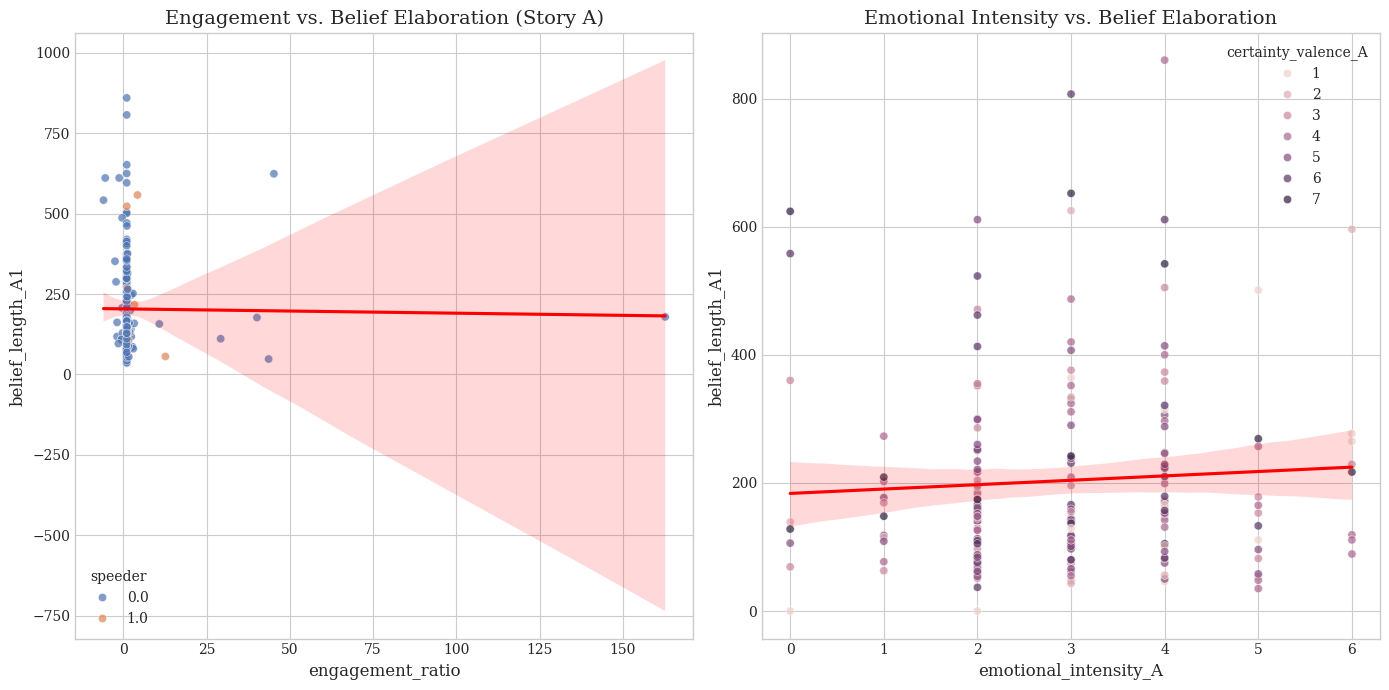

In [ ]:
# Analyze how engagement relates to belief formation
plt.figure(figsize=(14, 7))

# Plot 1: Engagement ratio vs. belief length
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='engagement_ratio',
    y='belief_length_A1',
    data=df,
    alpha=0.7,
    hue='speeder'  # Color by speeder flag
)
plt.title('Engagement vs. Belief Elaboration (Story A)', fontsize=14)
plt.xlabel('Engagement Ratio (time on task / total time)', fontsize=12)
plt.ylabel('Belief Statement Length (chars)', fontsize=12)
sns.regplot(x='engagement_ratio', y='belief_length_A1', data=df, scatter=False, color='red')

# Plot 2: Emotional intensity vs. belief length
plt.subplot(1, 2, 2)
# Create composite emotional intensity score
df['emotional_intensity_A'] = abs(df['Achap1_val_scale'] - 4) + abs(df['Achap1_aro_scale'] - 4)
sns.scatterplot(
    x='emotional_intensity_A',
    y='belief_length_A1',
    data=df,
    alpha=0.7,
    hue='certainty_valence_A'  # Color by certainty
)
plt.title('Emotional Intensity vs. Belief Elaboration', fontsize=14)
plt.xlabel('Emotional Intensity (distance from neutral)', fontsize=12)
plt.ylabel('Belief Statement Length (chars)', fontsize=12)
sns.regplot(x='emotional_intensity_A', y='belief_length_A1', data=df, scatter=False, color='red')

plt.tight_layout()
plt.savefig('engagement_and_beliefs.png', dpi=300)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

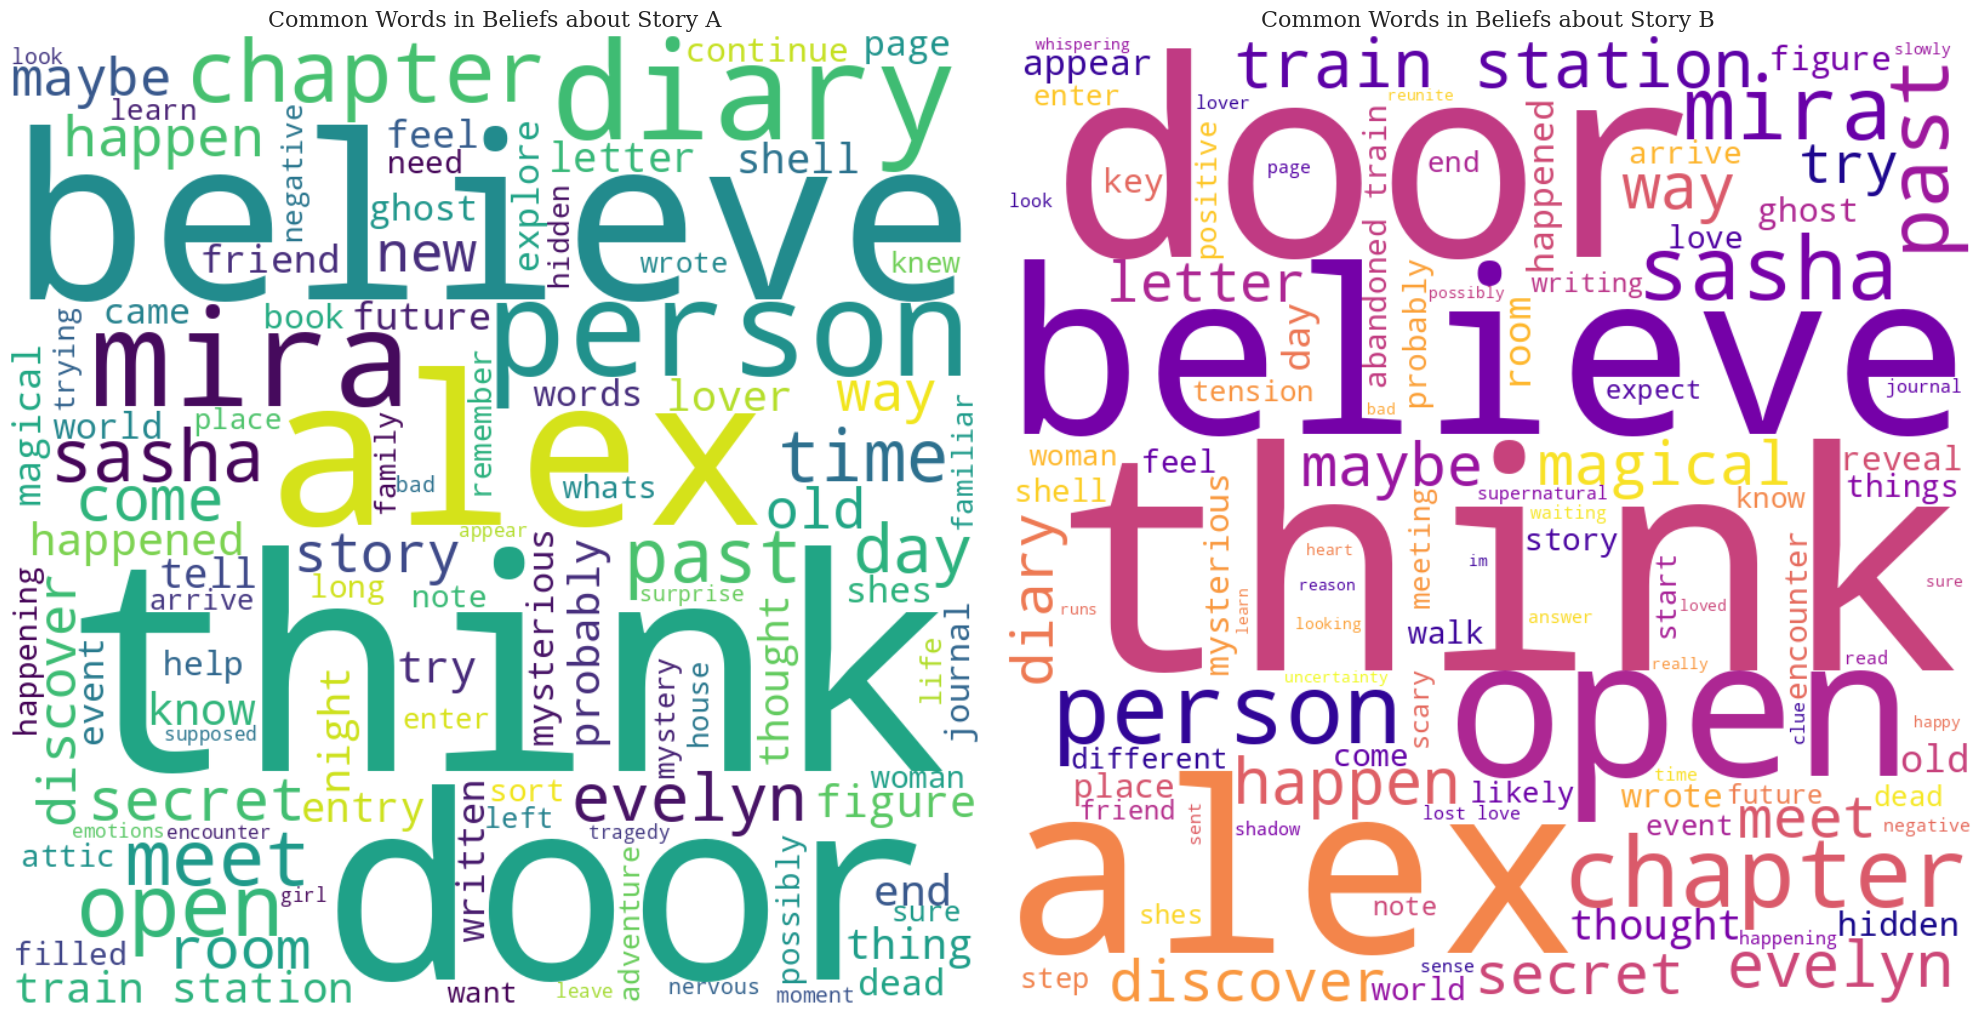


Top words in Story A beliefs:
think: 73
door: 57
believe: 50
alex: 41
person: 39
diary: 39
chapter: 38
mira: 37
open: 33
meet: 27
past: 27
time: 24
sasha: 23
day: 18
room: 17
evelyn: 17
secret: 17
come: 16
station: 16
story: 15

Top words in Story B beliefs:
think: 54
door: 45
alex: 34
believe: 32
open: 30
person: 29
chapter: 28
sasha: 23
mira: 22
past: 21
station: 19
train: 16
magical: 13
maybe: 13
way: 13
meet: 12
evelyn: 12
happen: 12
diary: 11
try: 11


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

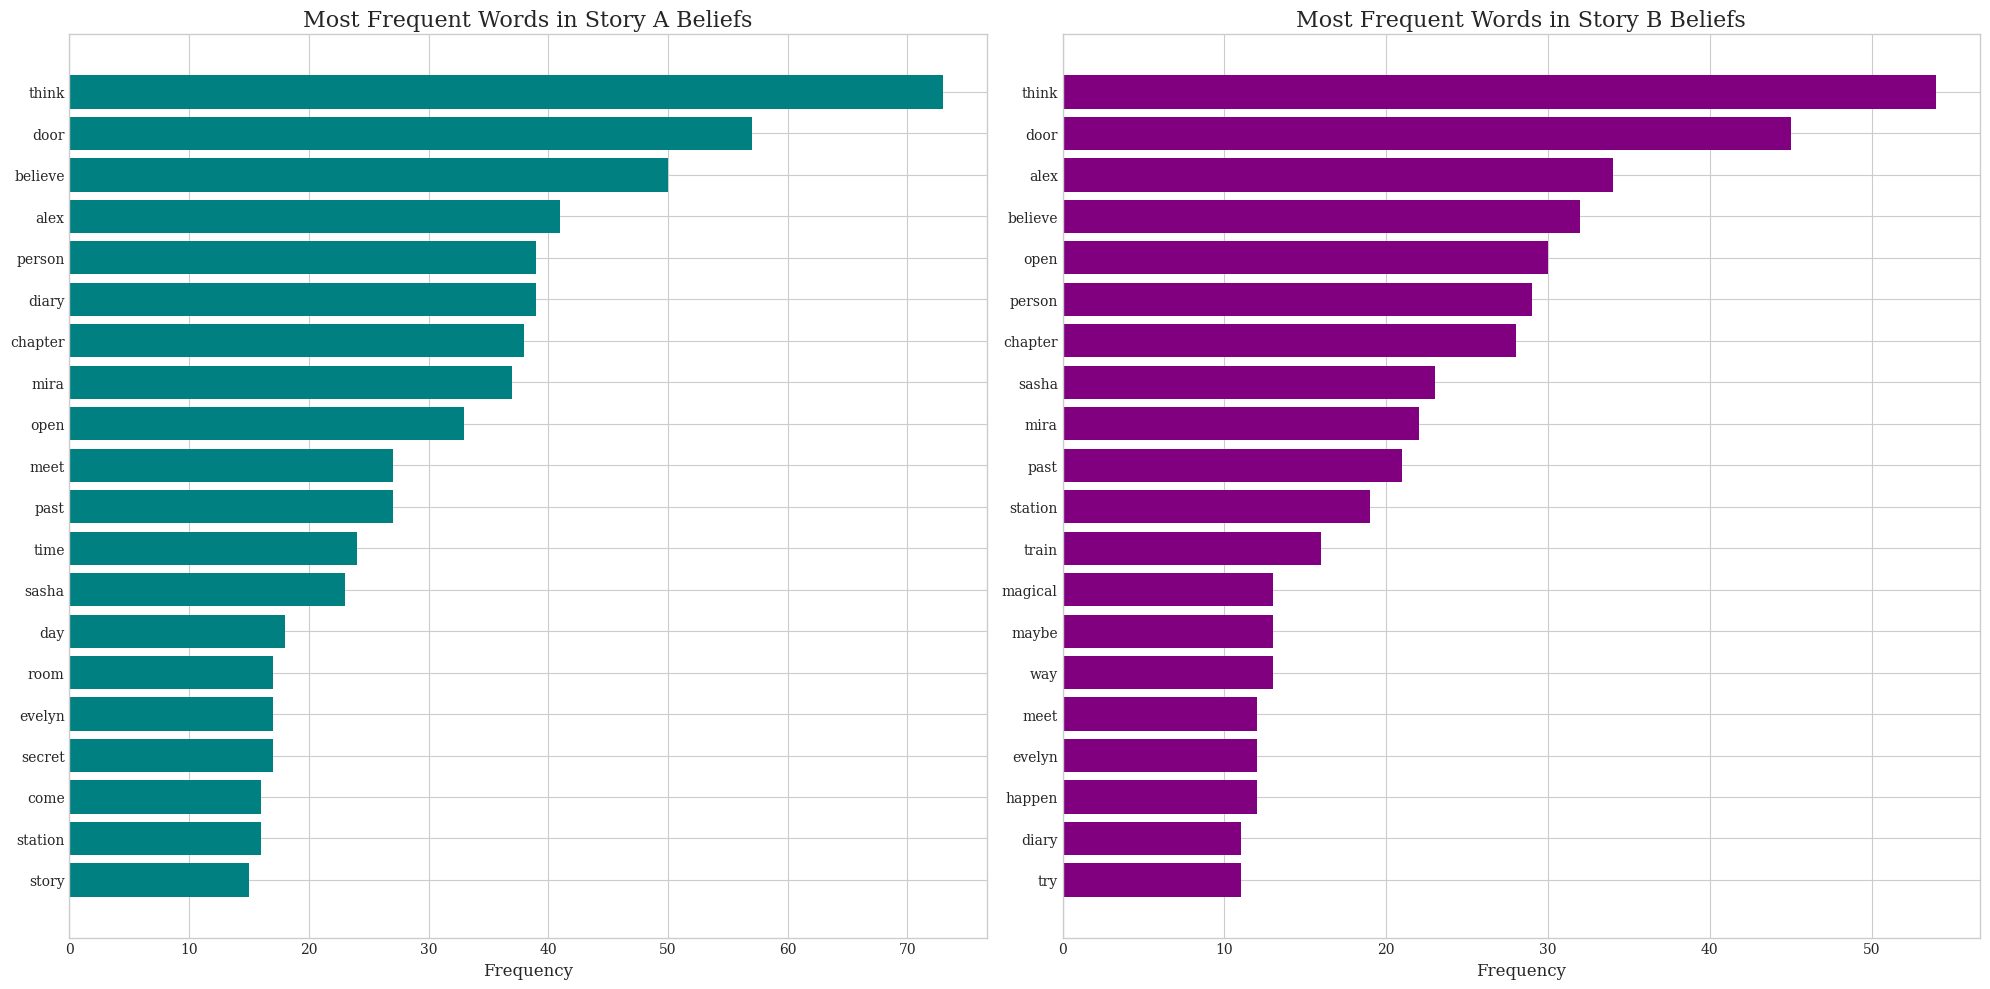

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

All files have been exported. Check your downloads folder for:
1. belief_wordclouds.png - Word cloud visualization
2. top_words_barchart.png - Bar chart of top words
3. top_words_analysis.csv - CSV file with word frequency data


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
import re
from google.colab import files

# Function to clean text
def clean_text(text):
    if isinstance(text, str):
        # Remove punctuation and convert to lowercase
        text = re.sub(r'[^\w\s]', '', text.lower())
        return text
    return ""

# Define custom stopwords to add to the default list
custom_stopwords = set(['will', 'without', 'such', 'also', 'may', 'would', 'could',
                        'should', 'must', 'cant', 'cant', 'wont', 'doesnt', 'dont',
                        'going', 'get', 'got', 'use', 'using', 'used', 'one', 'two',
                        'make', 'made', 'making', 'go', 'going', 'goes'])

# Combine with NLTK's stopwords and WordCloud's default stopwords
all_stopwords = set(STOPWORDS).union(set(ENGLISH_STOP_WORDS)).union(custom_stopwords)

# Clean and prepare belief statements
df['clean_belief_A1'] = df['Achap1_belief'].apply(clean_text)
df['clean_belief_B1'] = df['Bchap1_belief'].apply(clean_text)

# Create word clouds for each story
plt.figure(figsize=(20, 10))

# Word cloud for Story A beliefs
plt.subplot(1, 2, 1)
all_beliefs_a = ' '.join(df['clean_belief_A1'].dropna())
wordcloud_a = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10,
                      colormap='viridis',
                      max_words=100,
                      stopwords=all_stopwords).generate(all_beliefs_a)
plt.imshow(wordcloud_a, interpolation='bilinear')
plt.axis("off")
plt.title('Common Words in Beliefs about Story A', fontsize=16)

# Word cloud for Story B beliefs
plt.subplot(1, 2, 2)
all_beliefs_b = ' '.join(df['clean_belief_B1'].dropna())
wordcloud_b = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10,
                      colormap='plasma',
                      max_words=100,
                      stopwords=all_stopwords).generate(all_beliefs_b)
plt.imshow(wordcloud_b, interpolation='bilinear')
plt.axis("off")
plt.title('Common Words in Beliefs about Story B', fontsize=16)

plt.tight_layout()
plt.savefig('belief_wordclouds.png', dpi=300)

# Export the word cloud visualization
files.download('belief_wordclouds.png')
plt.show()

# Function to get the most common words after stopword removal
def get_top_words(text, n=20):
    # Tokenize
    words = text.split()
    # Filter out stopwords
    filtered_words = [word for word in words if word not in all_stopwords and len(word) > 2]
    # Count frequencies
    word_counts = Counter(filtered_words)
    # Return top N words
    return word_counts.most_common(n)

# Get top words for each story
top_words_a = get_top_words(all_beliefs_a, 20)
top_words_b = get_top_words(all_beliefs_b, 20)

print("\nTop words in Story A beliefs:")
for word, count in top_words_a:
    print(f"{word}: {count}")

print("\nTop words in Story B beliefs:")
for word, count in top_words_b:
    print(f"{word}: {count}")

# Create a bar chart for top words in each story
plt.figure(figsize=(20, 10))

# Bar chart for Story A top words
plt.subplot(1, 2, 1)
words_a, counts_a = zip(*top_words_a)
plt.barh(range(len(words_a)), counts_a, color='teal')
plt.yticks(range(len(words_a)), words_a)
plt.gca().invert_yaxis()  # Highest count at the top
plt.title('Most Frequent Words in Story A Beliefs', fontsize=16)
plt.xlabel('Frequency', fontsize=12)

# Bar chart for Story B top words
plt.subplot(1, 2, 2)
words_b, counts_b = zip(*top_words_b)
plt.barh(range(len(words_b)), counts_b, color='purple')
plt.yticks(range(len(words_b)), words_b)
plt.gca().invert_yaxis()  # Highest count at the top
plt.title('Most Frequent Words in Story B Beliefs', fontsize=16)
plt.xlabel('Frequency', fontsize=12)

plt.tight_layout()
plt.savefig('top_words_barchart.png', dpi=300)

# Export the bar chart
files.download('top_words_barchart.png')
plt.show()

# Create a CSV file with the top words for each story
import pandas as pd

# Create DataFrames for top words
df_words_a = pd.DataFrame(top_words_a, columns=['Word', 'Count'])
df_words_a['Story'] = 'A'

df_words_b = pd.DataFrame(top_words_b, columns=['Word', 'Count'])
df_words_b['Story'] = 'B'

# Combine the DataFrames
df_top_words = pd.concat([df_words_a, df_words_b])

# Save to CSV
df_top_words.to_csv('top_words_analysis.csv', index=False)

# Export the CSV
files.download('top_words_analysis.csv')

print("All files have been exported. Check your downloads folder for:")
print("1. belief_wordclouds.png - Word cloud visualization")
print("2. top_words_barchart.png - Bar chart of top words")
print("3. top_words_analysis.csv - CSV file with word frequency data")

Model performance for predicting belief length:
R² score: -0.049
RMSE: 122.508
Mean belief length: 203.6
Standard deviation of belief length: 149.6
RMSE as percentage of mean: 60.2%


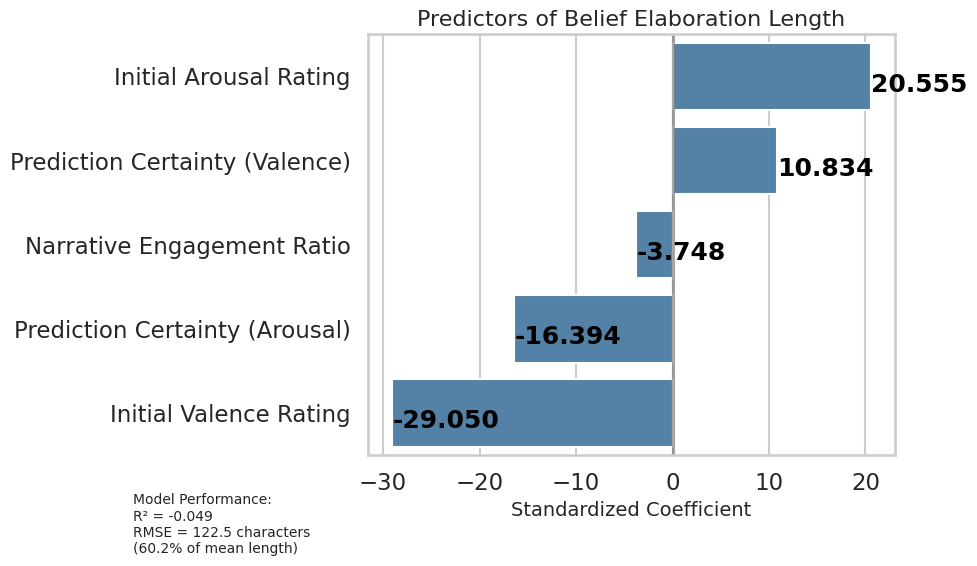


Plots saved as 'belief_predictors.png' and 'belief_prediction_accuracy.png'


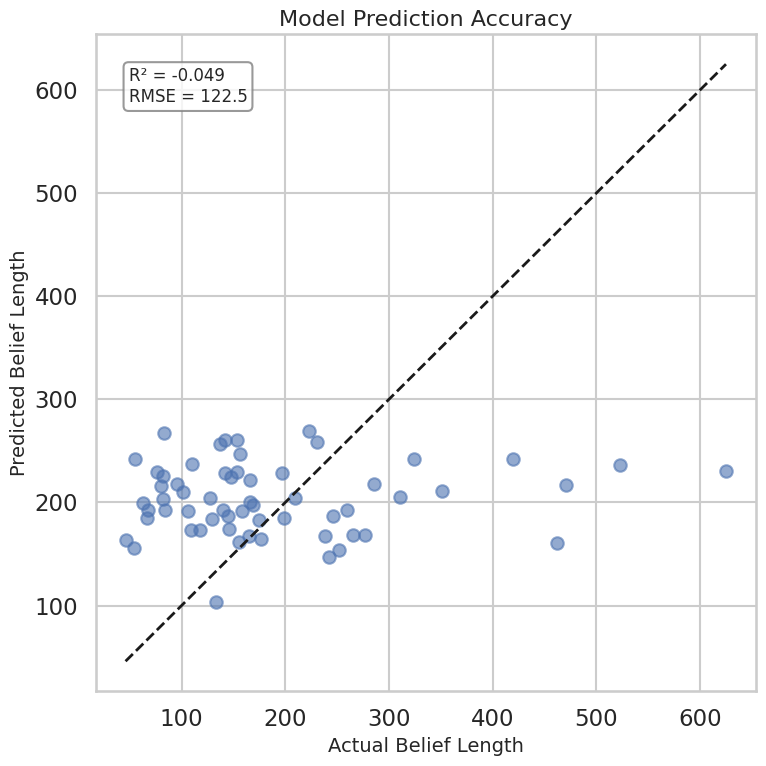

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Instead of using specific style, let's use basic styling
# This will avoid the "seaborn-whitegrid" error
sns.set_theme(style="whitegrid")  # More compatible syntax
sns.set_context("talk")  # Larger context for better readability

# Mapping for more descriptive feature names
feature_name_mapping = {
    'Achap1_val_scale': 'Initial Valence Rating',
    'Achap1_aro_scale': 'Initial Arousal Rating',
    'certainty_valence_A': 'Prediction Certainty (Valence)',
    'certainty_arousal_A': 'Prediction Certainty (Arousal)',
    'engagement_ratio': 'Narrative Engagement Ratio'
}

# Prepare features and target
features = ['Achap1_val_scale', 'Achap1_aro_scale', 'certainty_valence_A',
            'certainty_arousal_A', 'engagement_ratio']
X = df[features].copy()
y = df['belief_length_A1']

# Handle NaN values before splitting and scaling
X_cleaned = X.dropna()
y_cleaned = y.loc[X_cleaned.index]

# Split data (using cleaned data)
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.3,
random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model performance for predicting belief length:")
print(f"R² score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

# Calculate mean and std of the target for context
mean_length = y_cleaned.mean()
std_length = y_cleaned.std()
print(f"Mean belief length: {mean_length:.1f}")
print(f"Standard deviation of belief length: {std_length:.1f}")
print(f"RMSE as percentage of mean: {(rmse/mean_length)*100:.1f}%")

# Display feature importance with professional labels
coefficients = pd.DataFrame(
    {'Feature': [feature_name_mapping.get(feat, feat) for feat in features],
     'Original Feature': features,
     'Coefficient': model.coef_}
).sort_values('Coefficient', ascending=False)

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Coefficient', y='Feature', data=coefficients, color="steelblue")

# Add value labels to the bars
for i, v in enumerate(coefficients['Coefficient']):
    ax.text(v + (0.01 if v >= 0 else -0.01),
            i + 0.1,
            f"{v:.3f}",
            color='black',
            fontweight='bold',
            va='center')

# Add a vertical line at x=0
plt.axvline(x=0, color='gray', linestyle='-', alpha=0.7)

# Customize plot appearance
plt.title('Predictors of Belief Elaboration Length', fontsize=16)
plt.xlabel('Standardized Coefficient', fontsize=14)
plt.ylabel('')  # Remove y-axis label since feature names are self-explanatory

# Add model performance as text annotation
model_stats = f"Model Performance:\nR² = {r2:.3f}\nRMSE = {rmse:.1f} characters\n({(rmse/mean_length)*100:.1f}% of mean length)"
plt.figtext(0.15, 0.02, model_stats, fontsize=10,
           bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Make room for annotations
plt.savefig('belief_predictors.png', dpi=300, bbox_inches='tight')
plt.show()

# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Belief Length', fontsize=14)
plt.ylabel('Predicted Belief Length', fontsize=14)
plt.title('Model Prediction Accuracy', fontsize=16)

# Add stats to the plot
stats_text = f"R² = {r2:.3f}\nRMSE = {rmse:.1f}"
plt.annotate(stats_text, xy=(0.05, 0.95), xycoords='axes fraction',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
            va='top', fontsize=12)

plt.tight_layout()
plt.savefig('belief_prediction_accuracy.png', dpi=300)
print("\nPlots saved as 'belief_predictors.png' and 'belief_prediction_accuracy.png'")

# Save model coefficients to CSV for reference
coefficients.to_csv('belief_model_coefficients.csv', index=False)

<ipython-input-23-922492292606>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Count', data=genre_counts, palette='viridis')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

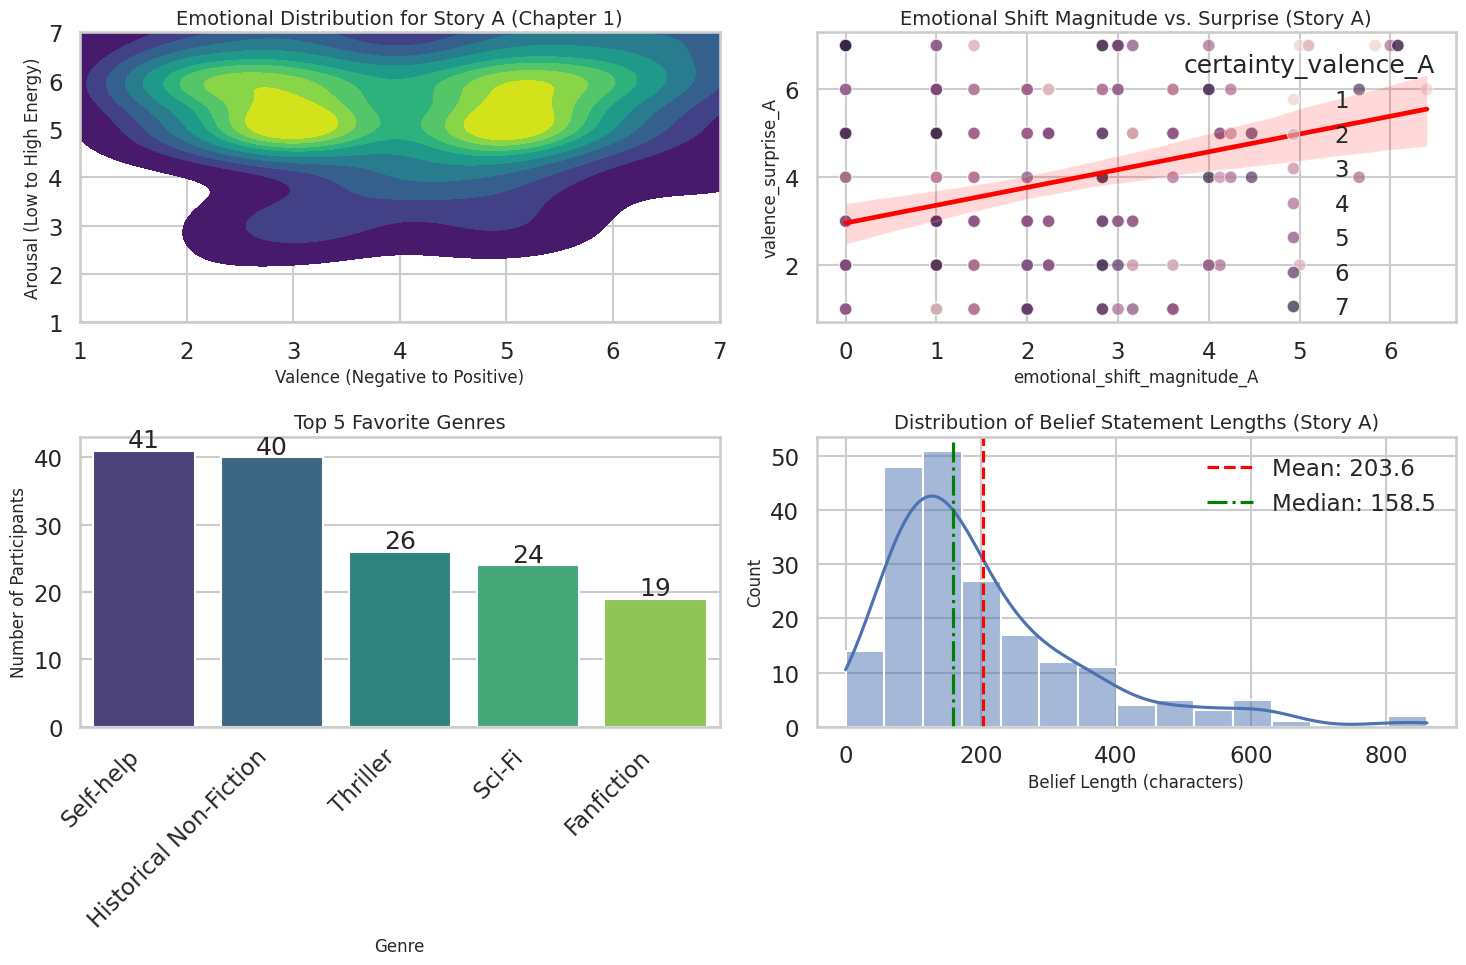

Summary visualization has been downloaded as 'key_findings_summary.png'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Complete summary plot without problematic colorbar
plt.figure(figsize=(15, 10))

# Plot 1: Valence and Arousal 2D distribution (Story A)
plt.subplot(2, 2, 1)
sns.kdeplot(
    data=df,
    x='Achap1_val_scale',
    y='Achap1_aro_scale',
    fill=True,
    cmap='viridis',
    thresh=0.05
)
plt.title('Emotional Distribution for Story A (Chapter 1)', fontsize=14)
plt.xlabel('Valence (Negative to Positive)', fontsize=12)
plt.ylabel('Arousal (Low to High Energy)', fontsize=12)
plt.xlim(1, 7)
plt.ylim(1, 7)
# No colorbar in this version to avoid errors

# Plot 2: Relationship between emotional change and surprise
plt.subplot(2, 2, 2)
# Create a composite emotional shift measure
df['emotional_shift_magnitude_A'] = np.sqrt(df['valence_change_A']**2 + df['arousal_change_A']**2)
sns.scatterplot(
    x='emotional_shift_magnitude_A',
    y='valence_surprise_A',
    data=df,
    alpha=0.7,
    hue='certainty_valence_A'
)
plt.title('Emotional Shift Magnitude vs. Surprise (Story A)', fontsize=14)
plt.xlabel('Magnitude of Emotional Shift', fontsize=12)
plt.ylabel('Surprise Level', fontsize=12)
sns.regplot(x='emotional_shift_magnitude_A', y='valence_surprise_A', data=df, scatter=False, color='red')

# Plot 3: Top genres and their average surprise levels
plt.subplot(2, 2, 3)
genre_counts = df['fav_genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
genre_counts = genre_counts.sort_values('Count', ascending=False).head(5)
sns.barplot(x='Genre', y='Count', data=genre_counts, palette='viridis')
plt.title('Top 5 Favorite Genres', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add count values on top of bars
for i, v in enumerate(genre_counts['Count']):
    plt.text(i, v + 0.5, str(v), ha='center')

# Plot 4: Belief length distribution
plt.subplot(2, 2, 4)
sns.histplot(df['belief_length_A1'], bins=15, kde=True)
plt.title('Distribution of Belief Statement Lengths (Story A)', fontsize=14)
plt.xlabel('Belief Length (characters)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add mean and median indicators
mean_length = df['belief_length_A1'].mean()
median_length = df['belief_length_A1'].median()
plt.axvline(mean_length, color='red', linestyle='--', label=f'Mean: {mean_length:.1f}')
plt.axvline(median_length, color='green', linestyle='-.', label=f'Median: {median_length:.1f}')
plt.legend()

plt.tight_layout()
plt.savefig('key_findings_summary.png', dpi=300)
files.download('key_findings_summary.png')
plt.show()

print("Summary visualization has been downloaded as 'key_findings_summary.png'")
